### Import Required Libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt # sub-library of matplotlib that provides MATLAB-like plotting functions
import seaborn as sns

# Display settings
plt.rcParams['figure.figsize'] = [12, 8]  # Set default figure size for entire session
plt.style.use('seaborn-v0_8-whitegrid')   # changes the overall visual style/theme of the plots

### Load Dataset

In [2]:
# Define the file path
file_path = r'G:\My Drive\Repos\Python Correlation\happyscore_income.csv'

# Load dataset into a pandas DataFrame
df = pd.read_csv(file_path)

In [3]:
df.head() # Display the first five rows

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


### Data Overview & Cleaning

In [4]:
# Detect any missing data within the DataFrame
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

country - 0.0%
adjusted_satisfaction - 0.0%
avg_satisfaction - 0.0%
std_satisfaction - 0.0%
avg_income - 0.0%
median_income - 0.0%
income_inequality - 0.0%
region - 0.0%
happyScore - 0.0%
GDP - 0.0%
country.1 - 0.0%


In [5]:
# Display data types of the columns
df.dtypes

country                   object
adjusted_satisfaction    float64
avg_satisfaction         float64
std_satisfaction         float64
avg_income               float64
median_income            float64
income_inequality        float64
region                    object
happyScore               float64
GDP                      float64
country.1                 object
dtype: object

In [6]:
# Change data type of a specific column
df['adjusted_satisfaction'] = df['adjusted_satisfaction'].astype('int64')

In [7]:
# Display data types to confirm the change made
df.dtypes

country                   object
adjusted_satisfaction      int64
avg_satisfaction         float64
std_satisfaction         float64
avg_income               float64
median_income            float64
income_inequality        float64
region                    object
happyScore               float64
GDP                      float64
country.1                 object
dtype: object

In [8]:
# Change column's datatype to string in order to slice it and store the result in a new column
df['region_sliced'] = df['region'].astype(str).str[1:-1]
df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1,region_sliced
0,Armenia,37,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia,Central and Eastern Europe
1,Angola,26,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola,Sub-Saharan Africa
2,Argentina,60,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina,Latin America and Caribbean
3,Austria,59,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria,Western Europe
4,Australia,65,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia,Australia and New Zealand


In [9]:
# Drop irrelevant/redundant columns
df.drop(['region', 'country.1'], axis=1, inplace=True)

In [10]:
# Sort the DataFrame by the 'happyScore' column (highest to lowest)
sorted_df = df.sort_values(by=['happyScore'], 
                           inplace=False,       # 'inplace=False' returns a new DataFrame instead of modifying directly
                           ascending=False) 

sorted_df

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP,region_sliced
17,Switzerland,70,8.0,1.62,23400.040,19442.920,32.930000,7.587,1.39651,Western Europe
48,Iceland,71,8.1,1.64,18828.345,16179.315,28.780000,7.561,1.30232,Western Europe
27,Denmark,74,8.4,1.53,17496.510,15630.885,28.155000,7.527,1.32548,Western Europe
77,Norway,70,8.0,1.62,21877.710,19477.620,27.307500,7.522,1.45900,Western Europe
16,Canada,69,8.0,1.71,20190.780,16829.100,33.790000,7.427,1.32629,North America
...,...,...,...,...,...,...,...,...,...,...
8,Burkina Faso,37,4.4,2.02,870.840,630.240,39.760000,3.587,0.25812,Sub-Saharan Africa
89,Rwanda,40,4.9,2.15,946.520,549.440,51.273333,3.465,0.22208,Sub-Saharan Africa
11,Benin,20,3.0,2.70,989.040,657.000,43.440000,3.340,0.28665,Sub-Saharan Africa
10,Burundi,25,2.9,1.96,572.880,436.920,33.360000,2.905,0.01530,Sub-Saharan Africa


### Adjust pandas display settings
This option tells pandas how many rows to display when printing a DataFrame.

In [11]:
# Set it to 'None' removes the limit, so all rows will be shown
pd.set_option('display.max_rows', None)

# To revert later, you can reset the option:
pd.reset_option('display.max_rows')

In [12]:
# Sort an individual column
df['country'].sort_values(ascending=False)

110         Zimbabwe
109           Zambia
107          Vietnam
106          Uruguay
105    United States
           ...      
3            Austria
4          Australia
0            Armenia
2          Argentina
1             Angola
Name: country, Length: 111, dtype: object

In [13]:
# Drop duplicates
df['country'] = df['country'].drop_duplicates()

### Scatter Plot — Income Inequality vs. Happiness Score

A scatter plot helps visualize how **income inequality** relates to the **happiness score** across countries.  
Each point represents one country, with:
- The x-axis showing *income inequality*
- The y-axis showing *happiness score*

We look for potential patterns or trends — for example, whether higher inequality is associated with lower happiness.

<function matplotlib.pyplot.show(close=None, block=None)>

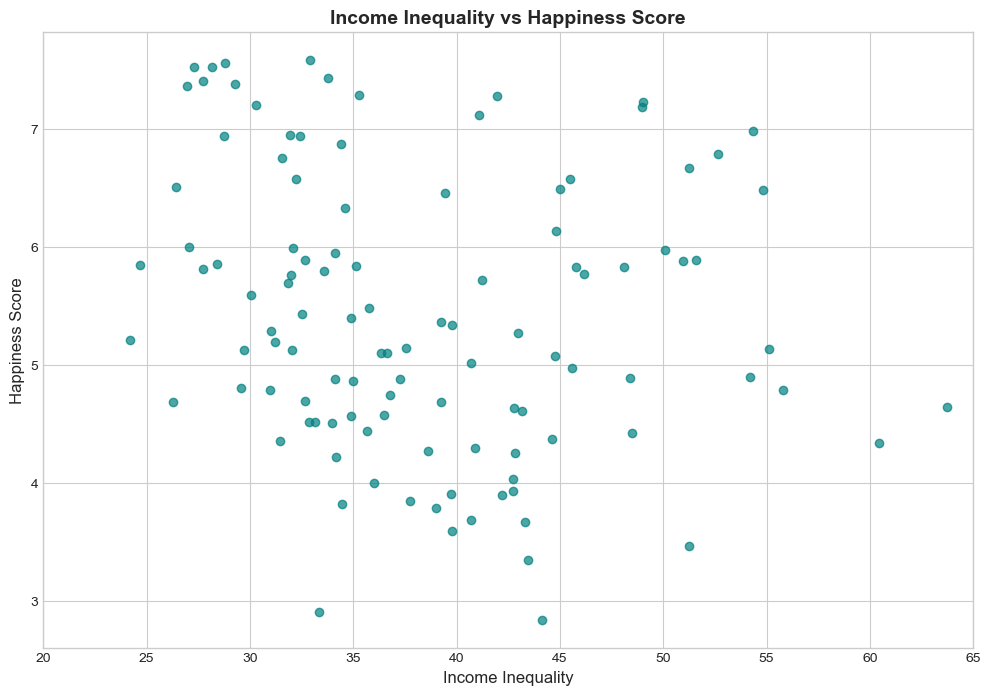

In [14]:
# Scatter Plot: Income Inequality vs Happiness Score
plt.scatter(x=df['income_inequality'],
            y=df['happyScore'], 
            alpha=0.7,                 # transparency for overlapping points
            color='Teal'               # custom color for aesthetics
           )

plt.title('Income Inequality vs Happiness Score', fontsize=14, fontweight='bold')
plt.xlabel('Income Inequality', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xlim([20, 65])
plt.show

### Regression Plot — Income Inequality vs. Happiness Score

This plot uses **Seaborn’s `regplot()`** to visualize the relationship between **income inequality** (x-axis) and **happiness score** (y-axis).

- The **purple points** represent individual data entries (countries).  
- The **red line** shows a fitted linear regression trend, illustrating the general direction of the relationship.

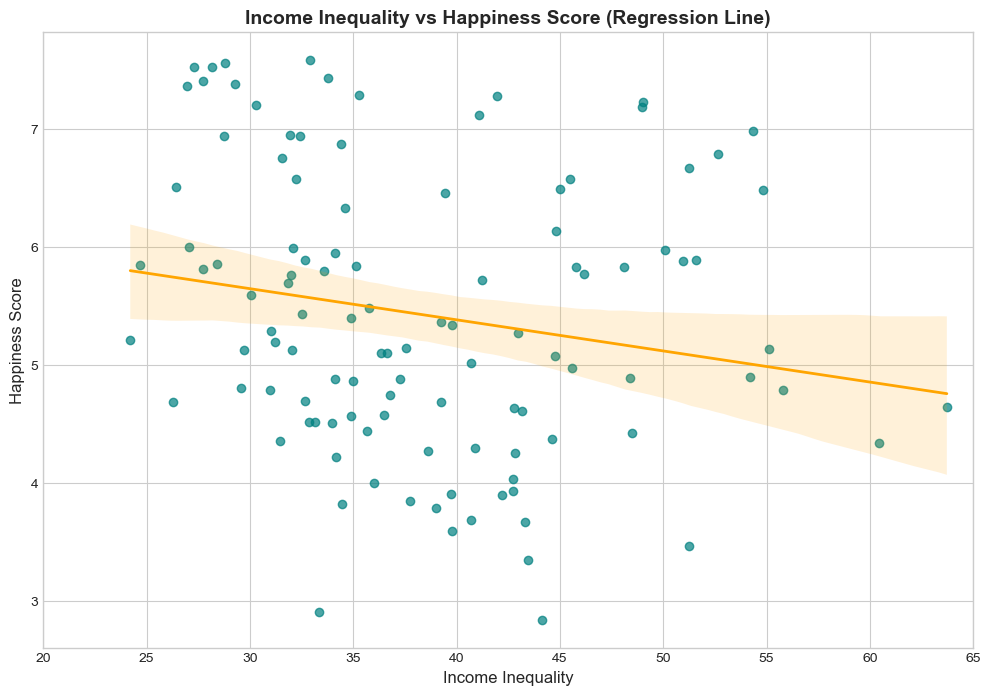

In [15]:
# Regression Plot: Income Inequality vs. Happiness Score
sns.regplot(x='income_inequality',
            y='happyScore', 
            data=df, 
            scatter_kws={'color':'teal', 'alpha': 0.7}, 
            line_kws={'color':'orange', 'linewidth': 2})

plt.title('Income Inequality vs Happiness Score (Regression Line)', fontsize=14, fontweight='bold')
plt.xlabel('Income Inequality', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xlim([20, 65])
plt.show()

#### Interpretation of the Regression Plot
- The trend line sloping downward suggests that higher income inequality tends to be associated with lower happiness levels.  
- This visual pattern aligns with socioeconomic findings where unequal income distribution often correlates with lower overall happiness in a population.

### Computing Correlation
Pandas dataframe.corr( ) is used to find the **pairwise correlation** of all columns in the Pandas Dataframe in Python.
#### Parameters
- `method`: Specifies the correlation method (e.g., 'pearson', 'kendall', 'spearman')
- `numeric_only`: Defaults to false. To ignore any non-numeric values, use numeric_only = True.
#### Methods Available
The corr( ) method supports different correlation methods:
- `pearson` **(default)**: Standard correlation coefficient, measures linear relationships.
- `kendall`: Kendall Tau correlation coefficient, measures ordinal association and more robust to small datasets.
- `spearman`: Spearman rank correlation, measures monotonic relationships.

In [16]:
correlation_matrix = df.corr(method='kendall', numeric_only=True)
correlation_matrix

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
adjusted_satisfaction,1.000000,0.905145,-0.378239,0.614896,0.593379,-0.124810,0.741682,0.581131
avg_satisfaction,0.905145,1.000000,-0.266347,0.618270,0.593810,-0.104128,0.732966,0.591166
std_satisfaction,-0.378239,-0.266347,1.000000,-0.237797,-0.233515,0.124672,-0.320795,-0.205190
avg_income,0.614896,0.618270,-0.237797,1.000000,0.929566,-0.229994,0.622277,0.841441
median_income,0.593379,0.593810,-0.233515,0.929566,1.000000,-0.299779,0.614087,0.847011
income_inequality,-0.124810,-0.104128,0.124672,-0.229994,-0.299779,1.000000,-0.166762,-0.264067
happyScore,0.741682,0.732966,-0.320795,0.622277,0.614087,-0.166762,1.000000,0.601310
GDP,0.581131,0.591166,-0.205190,0.841441,0.847011,-0.264067,0.601310,1.000000


#### Interpretation of the Correlation Matrix
The resulting correlation matrix shows Kendall's Tau coefficients between each pair of numeric variables.  
- Values near **+1** → strong positive association  
- Values near **–1** → strong negative association  
- Values near **0** → weak or no monotonic relationship

### Visualizing the Correlation Matrix
A heatmap provides a visual summary of the correlation matrix, helping to quickly identify which variables are strongly or weakly related.
- **Darker shades** indicate stronger correlations (positive or negative).  
- **Lighter shades** indicate weaker or no correlation.  

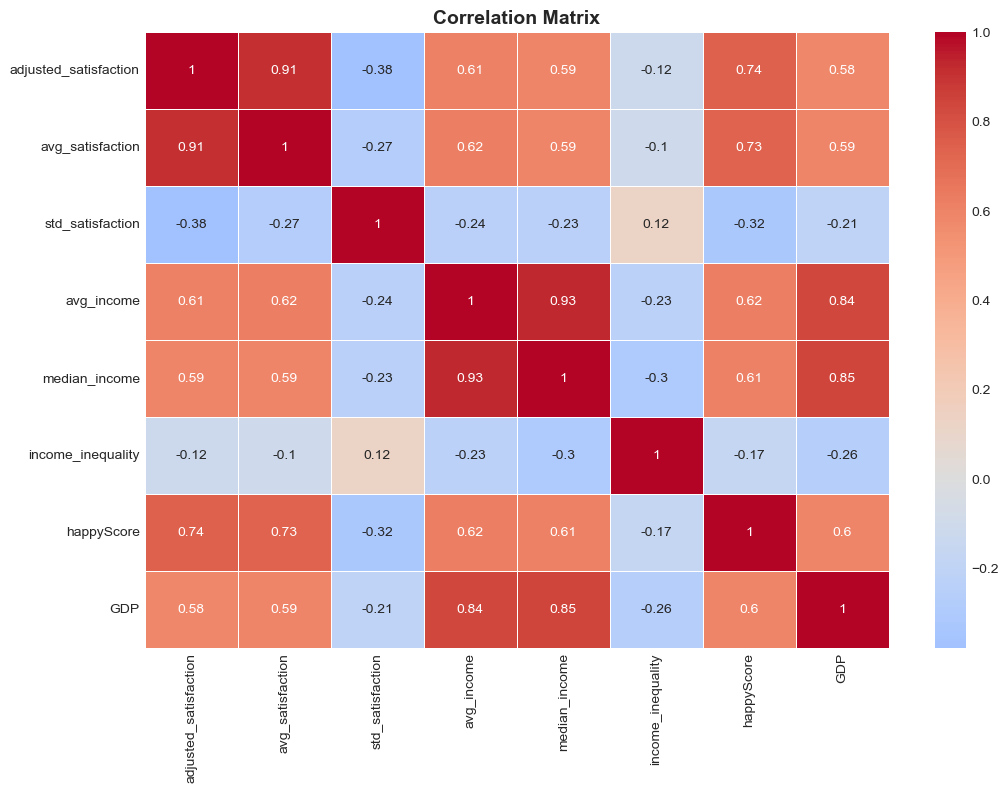

In [17]:
sns.heatmap(correlation_matrix,
            cmap='coolwarm',       # diverging color map: red-blue gradient centered at 0
            center=0,              # ensures 0 correlation is neutral in color
            linewidths=0.5,
            annot=True)            # 'annot=True' displays the actual correlation coefficients on the heatmap
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

### Converting Non-Numeric Columns to Numeric Codes
To include non-numeric variables in the correlation analysis, we first need to convert them into numeric form. This process is called **numerical encoding**, and here we use pandas’ built-in categorical encoding (`.astype('category')` + `.cat.codes`).

Each unique category is assigned a unique integer code, allowing us to compute correlations across all variables, including those that were originally strings.

> ⚠️ **Note:** These numeric codes *don't* represent meaningful magnitudes. Correlations computed on encoded categories should be interpreted cautiously.

In [18]:
# Create a copy of the original DataFrame to avoid modifying it directly
df_numerized = df.copy()

# Loop through all columns and convert non-numeric columns (dtype='object') to numeric codes
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':                         # Check if the column is non-numeric
        df_numerized[col] = df_numerized[col].astype('category')    # Convert the column to a categorical dtype
        df_numerized[col] = df_numerized[col].cat.codes             # Replace category labels with integer codes

# Display the numerically encoded DataFrame
df_numerized.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP,region_sliced
0,2,37,4.9,2.42,2096.76,1731.506667,31.445556,4.350,0.76821,1
1,0,26,4.3,3.19,1448.88,1044.240000,42.720000,4.033,0.75778,8
2,1,60,7.1,1.91,7101.12,5109.400000,45.475556,6.574,1.05351,3
3,4,59,7.2,2.11,19457.04,16879.620000,30.296250,7.200,1.33723,9
4,3,65,7.6,1.80,19917.00,15846.060000,35.285000,7.284,1.33358,0


#### Interpretation of the Numerical Encoding
- All categorical columns are now replaced with integer codes, allowing correlation analysis across the entire dataset.
- However, keep in mind that these encoded values are **ordinal placeholders**, not truly quantitative measures. The correlation results for these
variables should be viewed as rough indicators rather than precise relationships.

### Correlation Matrix Including All Fields (Numeric + Encoded Categories)
Now that all categorical columns have been numerically encoded, we can compute a **comprehensive correlation matrix** across *all* features.

In [19]:
numerized_correlation_matrix = df_numerized.corr(method='kendall')
numerized_correlation_matrix

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP,region_sliced
country,1.000000,-0.028634,-0.044457,-0.003623,-0.042752,-0.039148,0.030469,-0.007699,-0.046683,0.046144
adjusted_satisfaction,-0.028634,1.000000,0.905145,-0.378239,0.614896,0.593379,-0.124810,0.741682,0.581131,0.001089
avg_satisfaction,-0.044457,0.905145,1.000000,-0.266347,0.618270,0.593810,-0.104128,0.732966,0.591166,-0.010507
std_satisfaction,-0.003623,-0.378239,-0.266347,1.000000,-0.237797,-0.233515,0.124672,-0.320795,-0.205190,-0.213366
avg_income,-0.042752,0.614896,0.618270,-0.237797,1.000000,0.929566,-0.229994,0.622277,0.841441,-0.066972
median_income,-0.039148,0.593379,0.593810,-0.233515,0.929566,1.000000,-0.299779,0.614087,0.847011,-0.101086
income_inequality,0.030469,-0.124810,-0.104128,0.124672,-0.229994,-0.299779,1.000000,-0.166762,-0.264067,-0.007542
happyScore,-0.007699,0.741682,0.732966,-0.320795,0.622277,0.614087,-0.166762,1.000000,0.601310,-0.044349
GDP,-0.046683,0.581131,0.591166,-0.205190,0.841441,0.847011,-0.264067,0.601310,1.000000,-0.056558
region_sliced,0.046144,0.001089,-0.010507,-0.213366,-0.066972,-0.101086,-0.007542,-0.044349,-0.056558,1.000000


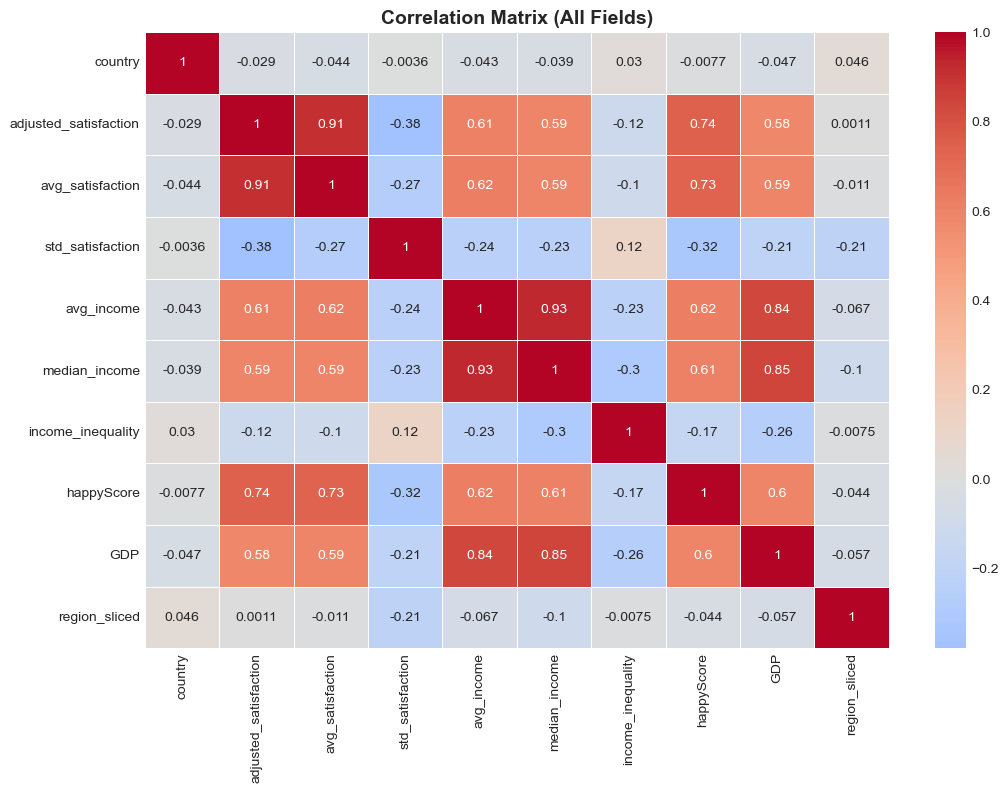

In [20]:
# Visualize the complete correlation matrix using a heatmap
sns.heatmap(numerized_correlation_matrix, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            annot=True)
plt.title('Correlation Matrix (All Fields)', fontsize=14, fontweight='bold')
plt.show()

### Selecting Correlations with the Target Variable (`happyScore`)
To focus on how **happiness** relates to key economic and social indicators, we extract the correlation values of `happyScore` with selected variables such as:
- `avg_income`  
- `GDP`  
- `income_inequality`  
- `region_sliced` *(encoded categorical variable)*  

This helps identify which factors are most strongly associated with happiness levels.

Below, we demonstrate two selection methods:
1. **Label-based selection** using `.loc[]`  
2. **Index-based selection** using `.iloc[]`

In [21]:
# Selection by Label — Correlation with respect to 'happyScore'
print("Correlation of happiness with key indicators:")

# display() renders data in proper tabular format
display(numerized_correlation_matrix.loc['happyScore', ['avg_income', 'GDP', 'income_inequality', 'region_sliced']].sort_values(ascending=False))

Correlation of happiness with key indicators:


avg_income           0.622277
GDP                  0.601310
region_sliced       -0.044349
income_inequality   -0.166762
Name: happyScore, dtype: float64

In [22]:
# Selection by Index
numerized_correlation_matrix.iloc[8, 4:7]

avg_income           0.841441
median_income        0.847011
income_inequality   -0.264067
Name: GDP, dtype: float64

### Visualizing Correlation of Happiness with Key Indicators
This bar chart visualizes how strongly the **Happiness Score (`happyScore`)** correlates with selected economic and social indicators.  
- 🔵 **Blue** → Positive correlation (happiness increases with the indicator)  
- 🔴 **Red** → Negative correlation (happiness decreases with the indicator)

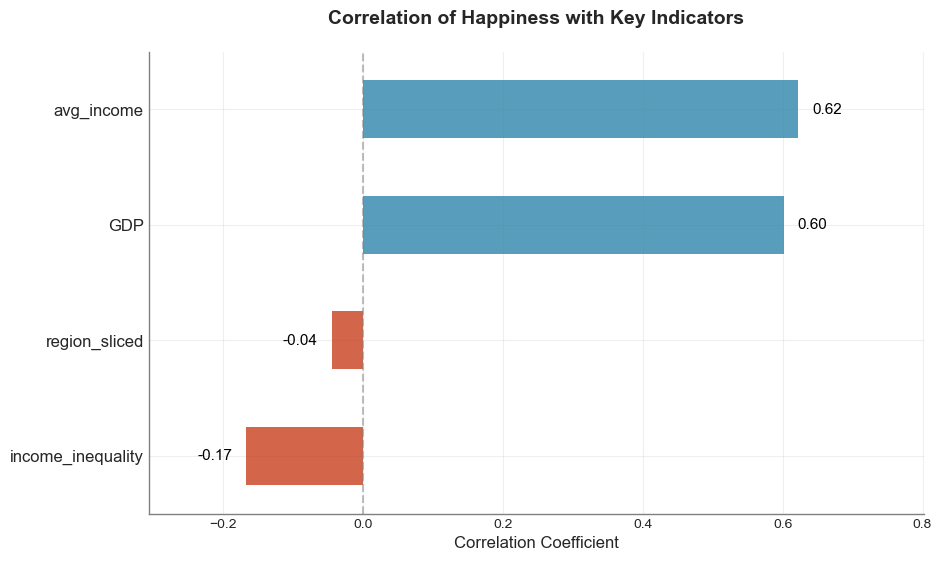

In [23]:
# Extract correlations between happiness and selected features
corr_subset = numerized_correlation_matrix.loc['happyScore', ['avg_income', 'GDP', 'income_inequality', 'region_sliced']].sort_values()

# Create figure and axis with custom size (overrides global setting)
fig, ax = plt.subplots(figsize=(10, 6))

# Assign colors dynamically based on correlation sign; Blue for positive, Red for negative
colors = corr_subset.apply(lambda x: '#2E86AB' if x > 0 else '#C73E1D')

# Plot the horizontal bar chart
corr_subset.plot(kind='barh', color=colors, alpha=0.8)

# Customize plot aesthetics
ax.set_title("Correlation of Happiness with Key Indicators", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Correlation Coefficient", fontsize=12)
ax.set_yticklabels(corr_subset.index, fontsize=12)
ax.grid(alpha=0.3)

# Add correlation values next to bars
for i, v in enumerate(corr_subset):
    ax.text(v + (0.02 if v > 0 else -0.07), i, f"{v:.2f}", va='center', fontsize=11, color='black')

# Add a vertical line at x=0 for reference
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Adjust x-axis limits for better spacing
x_min, x_max = ax.get_xlim()
ax.set_xlim(x_min - 0.1, x_max + 0.14)

# Render the final plot
plt.show()

#### Insights
- **Average Income** and **GDP** show strong positive correlations with happiness — countries with higher economic output and income levels tend to score higher in happiness.
- **Income Inequality** displays a negative correlation — as inequality rises, overall happiness tends to decrease.
- **Region (encoded)** has a weaker, possibly context-dependent relationship.

In [24]:
# Filter rows where the correlation with 'happyScore' is greater than or equal to 0.5
numerized_correlation_matrix[numerized_correlation_matrix['happyScore'] >= 0.5].sort_values(by='happyScore', ascending=False)

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP,region_sliced
happyScore,-0.007699,0.741682,0.732966,-0.320795,0.622277,0.614087,-0.166762,1.000000,0.601310,-0.044349
adjusted_satisfaction,-0.028634,1.000000,0.905145,-0.378239,0.614896,0.593379,-0.124810,0.741682,0.581131,0.001089
avg_satisfaction,-0.044457,0.905145,1.000000,-0.266347,0.618270,0.593810,-0.104128,0.732966,0.591166,-0.010507
avg_income,-0.042752,0.614896,0.618270,-0.237797,1.000000,0.929566,-0.229994,0.622277,0.841441,-0.066972
median_income,-0.039148,0.593379,0.593810,-0.233515,0.929566,1.000000,-0.299779,0.614087,0.847011,-0.101086
GDP,-0.046683,0.581131,0.591166,-0.205190,0.841441,0.847011,-0.264067,0.601310,1.000000,-0.056558


### Unstacking the Correlation Matrix
The correlation matrix is originally stored in a **2-dimensional (row × column)** format. To make it easier to search, sort, or filter correlation pairs, we can unstack the matrix into a **1-dimensional Series** where each element represents a *(variable A, variable B)* correlation pair.

In [25]:
# Unstack the correlation matrix into a Series of pairs
correlation_pairs = numerized_correlation_matrix.unstack()
correlation_pairs

country        country                  1.000000
               adjusted_satisfaction   -0.028634
               avg_satisfaction        -0.044457
               std_satisfaction        -0.003623
               avg_income              -0.042752
                                          ...   
region_sliced  median_income           -0.101086
               income_inequality       -0.007542
               happyScore              -0.044349
               GDP                     -0.056558
               region_sliced            1.000000
Length: 100, dtype: float64

In [26]:
# Sort all correlation pairs (Negative to Positive)
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

adjusted_satisfaction  std_satisfaction        -0.378239
std_satisfaction       adjusted_satisfaction   -0.378239
                       happyScore              -0.320795
happyScore             std_satisfaction        -0.320795
income_inequality      median_income           -0.299779
                                                  ...   
avg_satisfaction       avg_satisfaction         1.000000
GDP                    GDP                      1.000000
happyScore             happyScore               1.000000
income_inequality      income_inequality        1.000000
region_sliced          region_sliced            1.000000
Length: 100, dtype: float64

In [27]:
# Filter the Strongest Positive Correlation Pairs
high_corr = sorted_pairs[(sorted_pairs >= 0.5) & (sorted_pairs < 1)]
high_corr

adjusted_satisfaction  GDP                      0.581131
GDP                    adjusted_satisfaction    0.581131
                       avg_satisfaction         0.591166
avg_satisfaction       GDP                      0.591166
median_income          adjusted_satisfaction    0.593379
adjusted_satisfaction  median_income            0.593379
avg_satisfaction       median_income            0.593810
median_income          avg_satisfaction         0.593810
happyScore             GDP                      0.601310
GDP                    happyScore               0.601310
happyScore             median_income            0.614087
median_income          happyScore               0.614087
adjusted_satisfaction  avg_income               0.614896
avg_income             adjusted_satisfaction    0.614896
avg_satisfaction       avg_income               0.618270
avg_income             avg_satisfaction         0.618270
                       happyScore               0.622277
happyScore             avg_inco